<a href="https://colab.research.google.com/github/RajaAbitha/RajaAbitha/blob/main/case_study02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("/content/Wholesale customers data.csv")

In [ ]:
data.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [ ]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [ ]:
data.isnull().sum()

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


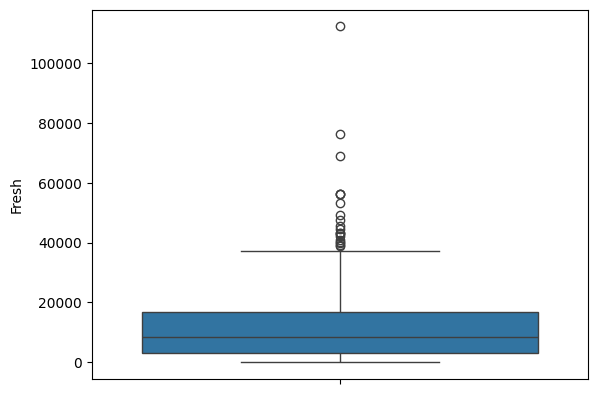

In [ ]:
sns.boxplot(data['Fresh'])
plt.show()

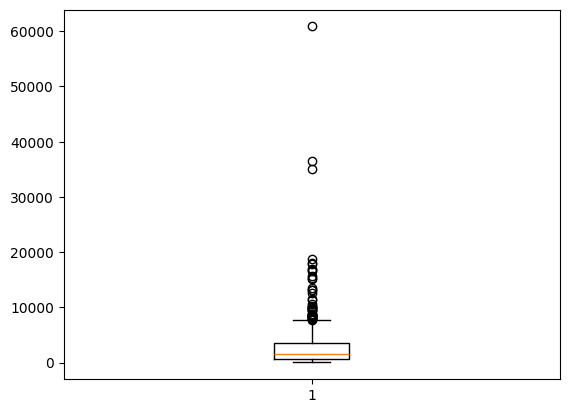

In [ ]:
plt.boxplot(data['Frozen'])
plt.show()

In [ ]:
Q1 = data['Fresh'].quantile(0.25)
Q3 = data['Fresh'].quantile(0.75)
IQR = Q3 - Q1


In [ ]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [ ]:
lower_bound, upper_bound,IQR

(np.float64(-17581.25), np.float64(37642.75), np.float64(13806.0))

In [ ]:
Fresh_new = data[(data['Fresh'] > upper_bound) | (data['Fresh'] < lower_bound)]
print(f"Number of outliers in 'Fresh': {len(Fresh_new)}")
data.head()


Number of outliers in 'Fresh': 20


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
data['Fresh_new'] = np.where(data['Fresh'] > upper_bound, upper_bound, data['Fresh'])


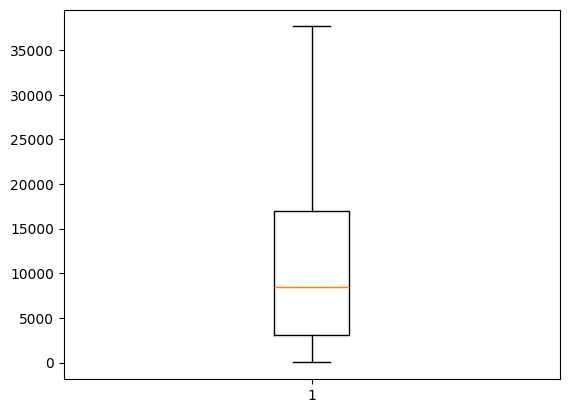

In [ ]:
plt.boxplot(data['Fresh_new'])
plt.show()

In [ ]:
Q1 = data['Milk'].quantile(0.30)
Q3 = data['Milk'].quantile(0.60)
IQR = Q3 - Q1


In [ ]:
lower_milk = Q1 - 1.5 * IQR
upper_milk = Q3 + 1.5 * IQR

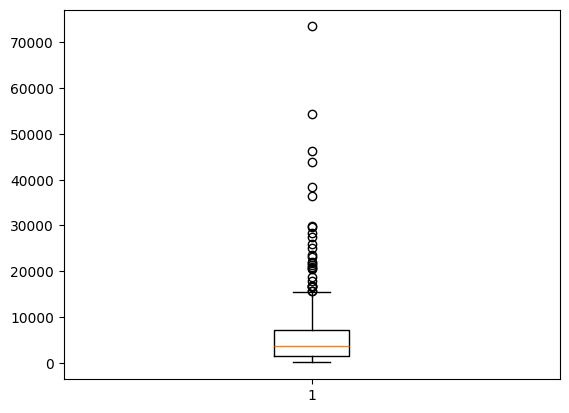

In [ ]:
plt.boxplot(data['Milk'])
plt.show()

In [ ]:
Milk_new = data[(data['Milk'] > upper_milk) | (data['Milk'] < lower_milk)]
print(f"Number of outliers in 'Milk': {len(Milk_new)}")
data.head()

Number of outliers in 'Milk': 74


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Fresh_new
0,2,3,12669,9656,7561,214,2674,1338,12669.0
1,2,3,7057,9810,9568,1762,3293,1776,7057.0
2,2,3,6353,8808,7684,2405,3516,7844,6353.0
3,1,3,13265,1196,4221,6404,507,1788,13265.0
4,2,3,22615,5410,7198,3915,1777,5185,22615.0


In [ ]:
data['Milk_new'] = np.where(data['Milk'] > upper_milk, upper_milk, data['Milk'])
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Fresh_new,Milk_new
0,2,3,12669,9656,7561,214,2674,1338,12669.0,9374.8
1,2,3,7057,9810,9568,1762,3293,1776,7057.0,9374.8
2,2,3,6353,8808,7684,2405,3516,7844,6353.0,8808.0
3,1,3,13265,1196,4221,6404,507,1788,13265.0,1196.0
4,2,3,22615,5410,7198,3915,1777,5185,22615.0,5410.0


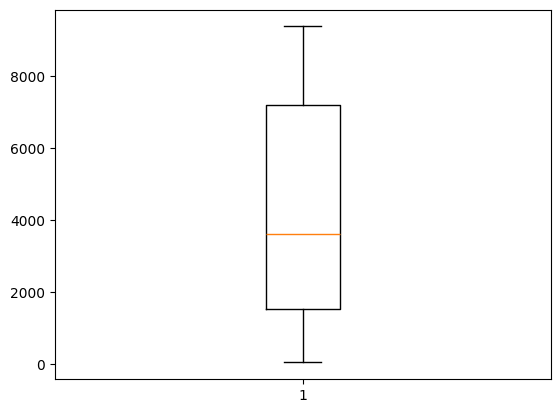

In [ ]:
plt.boxplot(data['Milk_new'])
plt.show()

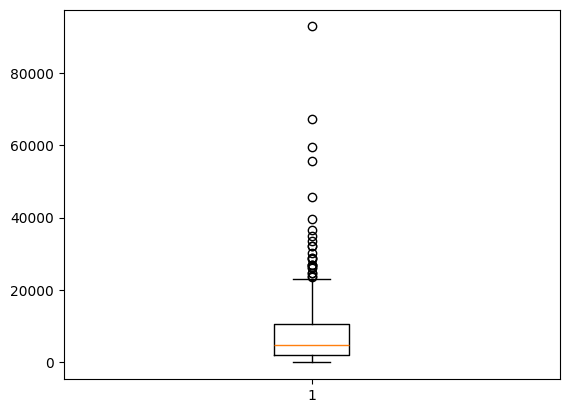

In [ ]:
plt.boxplot(data['Grocery'])
plt.show()

In [ ]:
Q1 = data['Grocery'].quantile(0.30)
Q3 = data['Grocery'].quantile(0.60)
IQR = Q3 - Q1


In [ ]:
lower_grocery = Q1 - 1.5 * IQR
upper_grocery = Q3 + 1.5 * IQR

In [ ]:
Grocery_new = data[(data['Grocery'] > upper_grocery) | (data['Grocery'] < lower_grocery)]
print(f"Number of outliers in 'Grocery': {len(Grocery_new)}")
data.head()

Number of outliers in 'Grocery': 81


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Fresh_new,Milk_new
0,2,3,12669,9656,7561,214,2674,1338,12669.0,9374.8
1,2,3,7057,9810,9568,1762,3293,1776,7057.0,9374.8
2,2,3,6353,8808,7684,2405,3516,7844,6353.0,8808.0
3,1,3,13265,1196,4221,6404,507,1788,13265.0,1196.0
4,2,3,22615,5410,7198,3915,1777,5185,22615.0,5410.0


In [ ]:
data['Grocery_new'] = np.where(data['Grocery'] > upper_grocery, upper_grocery, data['Grocery'])
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Fresh_new,Milk_new,Grocery_new
0,2,3,12669,9656,7561,214,2674,1338,12669.0,9374.8,7561.0
1,2,3,7057,9810,9568,1762,3293,1776,7057.0,9374.8,9568.0
2,2,3,6353,8808,7684,2405,3516,7844,6353.0,8808.0,7684.0
3,1,3,13265,1196,4221,6404,507,1788,13265.0,1196.0,4221.0
4,2,3,22615,5410,7198,3915,1777,5185,22615.0,5410.0,7198.0


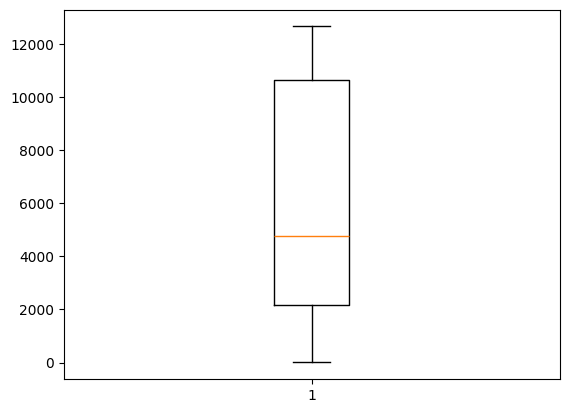

In [ ]:
plt.boxplot(data['Grocery_new'])
plt.show()

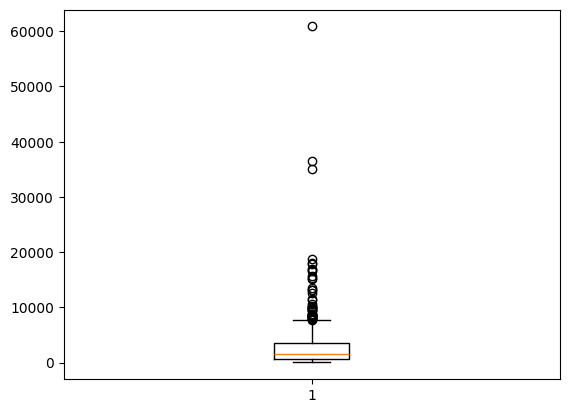

In [ ]:
plt.boxplot(data['Frozen'])
plt.show()

In [ ]:
Q1 = data['Frozen'].quantile(0.25)
Q3 = data['Frozen'].quantile(0.75)
IQR = Q3 - Q1
lower_frozen = Q1 - 1.5 * IQR
upper_frozen= Q3 + 1.5 * IQR
lower_frozen, upper_frozen,IQR

(np.float64(-3475.75), np.float64(7772.25), np.float64(2812.0))

In [ ]:
Frozen_new = data[(data['Frozen'] > upper_frozen) | (data['Frozen'] < lower_frozen)]
print(f"Number of outliers in 'Frozen': {len(Frozen_new)}")
data.head()

Number of outliers in 'Frozen': 43


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Fresh_new,Milk_new,Grocery_new
0,2,3,12669,9656,7561,214,2674,1338,12669.0,9374.8,7561.0
1,2,3,7057,9810,9568,1762,3293,1776,7057.0,9374.8,9568.0
2,2,3,6353,8808,7684,2405,3516,7844,6353.0,8808.0,7684.0
3,1,3,13265,1196,4221,6404,507,1788,13265.0,1196.0,4221.0
4,2,3,22615,5410,7198,3915,1777,5185,22615.0,5410.0,7198.0


In [ ]:
data['Frozen_new'] = np.where(data['Frozen'] > upper_frozen, upper_frozen, data['Frozen'])
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Fresh_new,Milk_new,Grocery_new,Frozen_new
0,2,3,12669,9656,7561,214,2674,1338,12669.0,9374.8,7561.0,214.0
1,2,3,7057,9810,9568,1762,3293,1776,7057.0,9374.8,9568.0,1762.0
2,2,3,6353,8808,7684,2405,3516,7844,6353.0,8808.0,7684.0,2405.0
3,1,3,13265,1196,4221,6404,507,1788,13265.0,1196.0,4221.0,6404.0
4,2,3,22615,5410,7198,3915,1777,5185,22615.0,5410.0,7198.0,3915.0


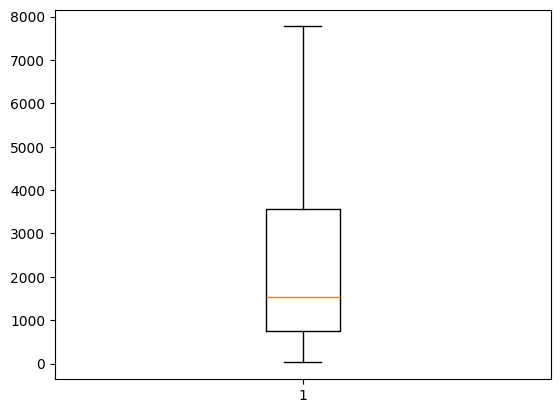

In [ ]:
plt.boxplot(data['Frozen_new'])
plt.show()

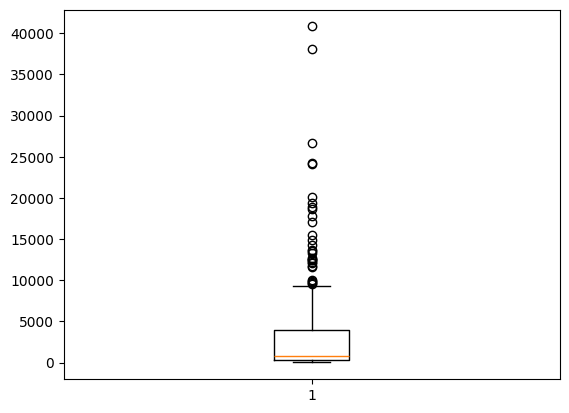

In [ ]:
plt.boxplot(data['Detergents_Paper'])
plt.show()

In [ ]:
Q1 = data['Detergents_Paper'].quantile(0.25)
Q3 = data['Detergents_Paper'].quantile(0.75)
IQR = Q3 - Q1
lower_detergents = Q1 - 1.5 * IQR
upper_detergents= Q3 + 1.5 * IQR
lower_detergents,upper_detergents,IQR

(np.float64(-5241.125), np.float64(9419.875), np.float64(3665.25))

In [ ]:
detol = data[(data['Detergents_Paper'] > upper_detergents) | (data['Detergents_Paper'] < lower_detergents)]
print(f"Number of outliers in 'Detergent_paper': {len(detol)}")
data.head()

Number of outliers in 'Detergent_paper': 30


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Fresh_new,Milk_new,Grocery_new,Frozen_new
0,2,3,12669,9656,7561,214,2674,1338,12669.0,9374.8,7561.0,214.0
1,2,3,7057,9810,9568,1762,3293,1776,7057.0,9374.8,9568.0,1762.0
2,2,3,6353,8808,7684,2405,3516,7844,6353.0,8808.0,7684.0,2405.0
3,1,3,13265,1196,4221,6404,507,1788,13265.0,1196.0,4221.0,6404.0
4,2,3,22615,5410,7198,3915,1777,5185,22615.0,5410.0,7198.0,3915.0


In [ ]:
data['Detergents_new'] = np.where(data['Detergents_Paper'] > upper_detergents, upper_detergents, data['Detergents_Paper'])
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Fresh_new,Milk_new,Grocery_new,Frozen_new,Detergents_new
0,2,3,12669,9656,7561,214,2674,1338,12669.0,9374.8,7561.0,214.0,2674.0
1,2,3,7057,9810,9568,1762,3293,1776,7057.0,9374.8,9568.0,1762.0,3293.0
2,2,3,6353,8808,7684,2405,3516,7844,6353.0,8808.0,7684.0,2405.0,3516.0
3,1,3,13265,1196,4221,6404,507,1788,13265.0,1196.0,4221.0,6404.0,507.0
4,2,3,22615,5410,7198,3915,1777,5185,22615.0,5410.0,7198.0,3915.0,1777.0


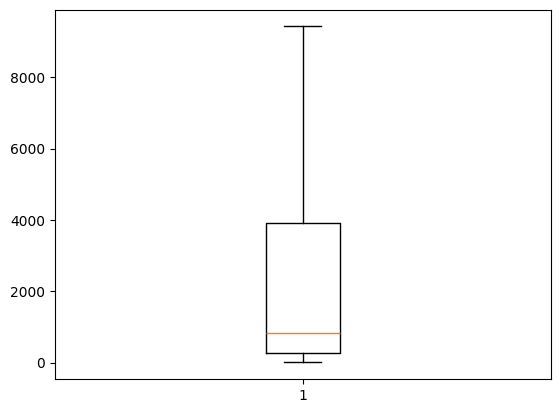

In [ ]:
plt.boxplot(data['Detergents_new'])
plt.show()

In [ ]:
#x=data.drop(['Channel','Region'],axis=1)

In [ ]:
data_processed = data[['Channel', 'Region', 'Fresh_new', 'Milk_new', 'Grocery_new', 'Frozen_new', 'Detergents_new', 'Delicassen']].copy()
data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Channel         440 non-null    int64  
 1   Region          440 non-null    int64  
 2   Fresh_new       440 non-null    float64
 3   Milk_new        440 non-null    float64
 4   Grocery_new     440 non-null    float64
 5   Frozen_new      440 non-null    float64
 6   Detergents_new  440 non-null    float64
 7   Delicassen      440 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 27.6 KB


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(data_processed)


In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  km = KMeans(n_clusters = i,n_init=10,random_state=42)
  km.fit(x_scaled)
  css = km.inertia_
  wcss.append(css)

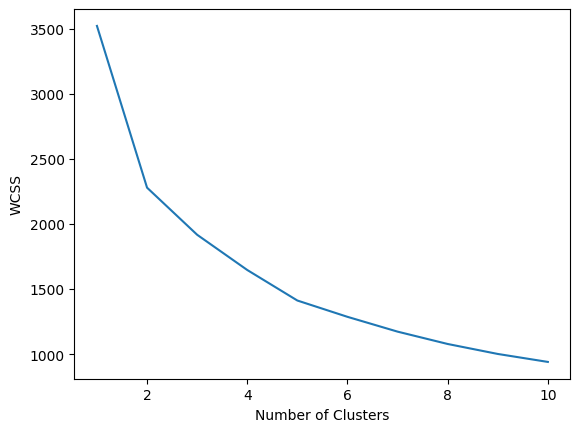

In [ ]:
plt.plot(range(1,11),wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
km = KMeans(n_clusters = 3,n_init = 10)
km.fit(x_scaled)

KMeans(n_clusters=3, n_init=10)

In [ ]:
cluster_label=km.predict(x_scaled)
cluster_label

array([1, 1, 1, 0, 0, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2,
       0, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 0, 2, 1, 0, 1, 1, 0, 0, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1,
       2, 1, 0, 2, 0, 0, 0, 0, 1, 2, 0, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 0,
       0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 2, 0, 1, 1, 1, 0, 2, 2, 1, 1, 1, 1,
       2, 1, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 0, 0, 0, 1, 2, 2, 0, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1,
       0, 2, 2, 2, 2, 0, 1, 0, 2, 2, 2, 0, 1, 1, 0, 2, 2, 1, 2, 0, 0, 1,
       2, 2, 1, 1, 0, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2,
       2, 1, 0, 0, 2, 2, 1, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2,
       2, 2, 1, 1, 2, 2, 2, 0, 2, 1, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 2,
       1, 0, 1, 0, 1, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 1, 2, 1, 0, 0, 0, 2,
       2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1,

In [ ]:
pd.Series(cluster_label).value_counts()

,count
2,210
1,140
0,90


In [ ]:
data['Cluster_labels'] = cluster_label

In [ ]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Fresh_new,Milk_new,Grocery_new,Frozen_new,Detergents_new,Cluster_labels
0,2,3,12669,9656,7561,214,2674,1338,12669.0,9374.8,7561.0,214.0,2674.0,1
1,2,3,7057,9810,9568,1762,3293,1776,7057.0,9374.8,9568.0,1762.0,3293.0,1
2,2,3,6353,8808,7684,2405,3516,7844,6353.0,8808.0,7684.0,2405.0,3516.0,1
3,1,3,13265,1196,4221,6404,507,1788,13265.0,1196.0,4221.0,6404.0,507.0,0
4,2,3,22615,5410,7198,3915,1777,5185,22615.0,5410.0,7198.0,3915.0,1777.0,0


In [ ]:
data[data['Cluster_labels']==0]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Fresh_new,Milk_new,Grocery_new,Frozen_new,Detergents_new,Cluster_labels
3,1,3,13265,1196,4221,6404,507,1788,13265.00,1196.0,4221.00,6404.00,507.0,0
4,2,3,22615,5410,7198,3915,1777,5185,22615.00,5410.0,7198.00,3915.00,1777.0,0
22,1,3,31276,1917,4469,9408,2381,4334,31276.00,1917.0,4469.00,7772.25,2381.0,0
33,1,3,29729,4786,7326,6130,361,1083,29729.00,4786.0,7326.00,6130.00,361.0,0
36,1,3,29955,4362,5428,1729,862,4626,29955.00,4362.0,5428.00,1729.00,862.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,1,3,11243,2408,2593,15348,108,1886,11243.00,2408.0,2593.00,7772.25,108.0,0
427,1,3,31012,16687,5429,15082,439,1163,31012.00,9374.8,5429.00,7772.25,439.0,0
431,1,3,8533,5506,5160,13486,1377,1498,8533.00,5506.0,5160.00,7772.25,1377.0,0
435,1,3,29703,12051,16027,13135,182,2204,29703.00,9374.8,12657.25,7772.25,182.0,0


In [ ]:
data[data['Cluster_labels']==1]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Fresh_new,Milk_new,Grocery_new,Frozen_new,Detergents_new,Cluster_labels
0,2,3,12669,9656,7561,214,2674,1338,12669.0,9374.8,7561.00,214.0,2674.000,1
1,2,3,7057,9810,9568,1762,3293,1776,7057.0,9374.8,9568.00,1762.0,3293.000,1
2,2,3,6353,8808,7684,2405,3516,7844,6353.0,8808.0,7684.00,2405.0,3516.000,1
5,2,3,9413,8259,5126,666,1795,1451,9413.0,8259.0,5126.00,666.0,1795.000,1
6,2,3,12126,3199,6975,480,3140,545,12126.0,3199.0,6975.00,480.0,3140.000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,1,3,4456,5266,13227,25,6818,1393,4456.0,5266.0,12657.25,25.0,6818.000,1
421,2,3,17063,4847,9053,1031,3415,1784,17063.0,4847.0,9053.00,1031.0,3415.000,1
424,2,3,16980,2884,12232,874,3213,249,16980.0,2884.0,12232.00,874.0,3213.000,1
426,1,3,13134,9347,14316,3141,5079,1894,13134.0,9347.0,12657.25,3141.0,5079.000,1


In [ ]:
fresh_col_index = data_processed.columns.get_loc('Fresh_new')
milk_col_index = data_processed.columns.get_loc('Grocery_new')

frozen_col_index= data_processed.columns.get_loc('Frozen_new')
deassen_col_index = data_processed.columns.get_loc('Delicassen')
detergents_col_index = data_processed.columns.get_loc('Detergents_new')



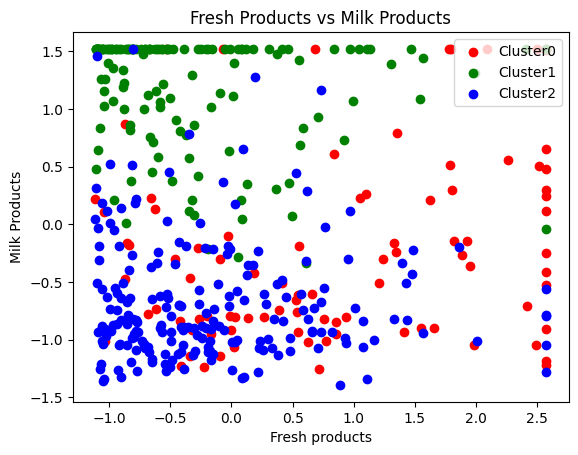

In [ ]:
colors=['r','g','b','y','c']

colors = ['r','g','b','y','c']
for i in range(max(cluster_label)+1):
  cluster_data = x_scaled[cluster_label==i]
  plt.scatter(cluster_data[:,fresh_col_index],
              cluster_data[:,milk_col_index],
              c = colors[i],
              label = f'Cluster{i}')
plt.legend()
plt.xlabel('Fresh products')
plt.ylabel('Milk Products')
plt.title('Fresh Products vs Milk Products')
plt.show()

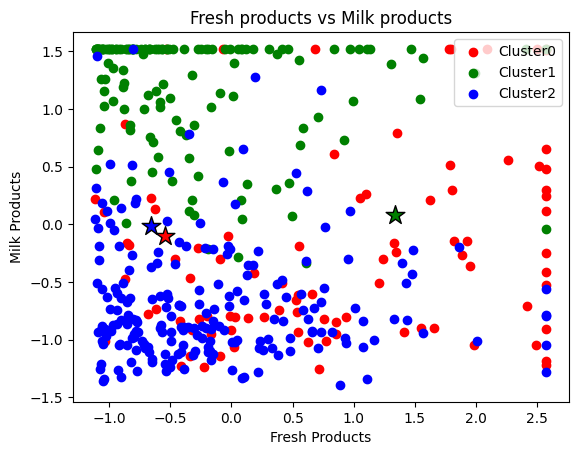

In [ ]:
colors = ['r','g','b','y','c']
for i in range(max(cluster_label)+1):
  cluster_data = x_scaled[cluster_label==i]
  plt.scatter(cluster_data[:,fresh_col_index],
              cluster_data[:,milk_col_index],
              c = colors[i],
              label = f'Cluster{i}')
  plt.scatter(km.cluster_centers_[i,0],
              km.cluster_centers_[i,1],
              c = colors[i],
              marker = '*',s = 200,
              edgecolor='black')
plt.legend()
plt.xlabel('Fresh Products')
plt.ylabel('Milk Products')
plt.title('Fresh products vs Milk products')
plt.show()

In [ ]:
km.cluster_centers_

array([[-0.5477005 , -0.09893449,  0.86402934, -0.08255746, -0.24774655,
         1.58718345, -0.56118388,  0.41731722],
       [ 1.3417042 ,  0.08270196, -0.3144076 ,  1.00679088,  1.16713623,
        -0.44987682,  1.23509915,  0.07135286],
       [-0.65974068, -0.01273414, -0.16069322, -0.63581215, -0.67191373,
        -0.3803036 , -0.58289205, -0.22641881]])

In [ ]:
def predict_cluster(g,a,sal,spend):
  new_data=[[g,a,sal,spend]]
  cluster=km.predict(new_data)
  return cluster[0]

In [ ]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

In [ ]:
mergings = linkage(x_scaled,method='ward')

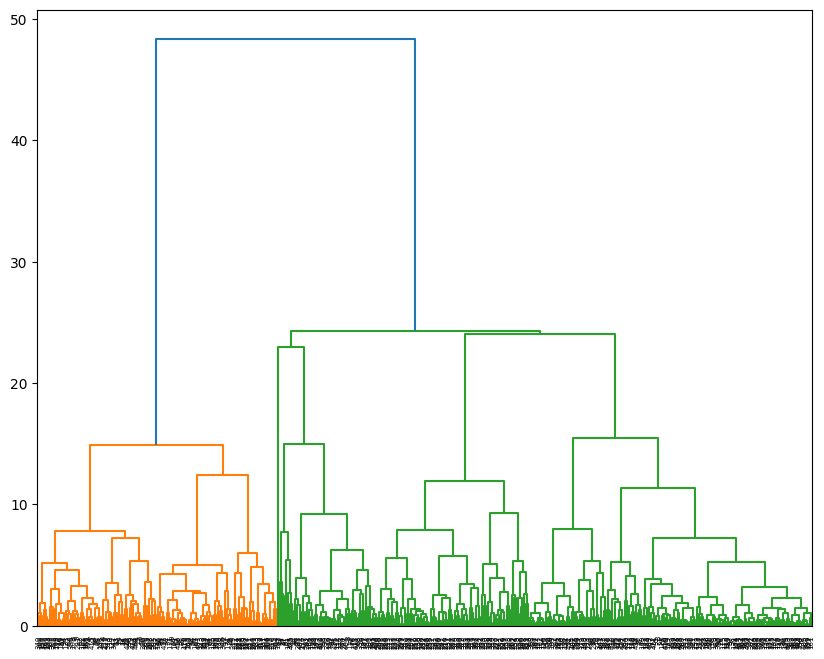

In [ ]:
plt.figure(figsize = (10,8))
plt.axhline(350,color='r',linestyle='--')
dendrogram(mergings)
plt.show()

In [ ]:
clusters=fcluster(mergings,35,criterion='distance')

In [ ]:
clusters

array([1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2,
       2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1,
       2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2,
       2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1,

In [ ]:
clusters=fcluster(mergings,35,criterion='distance')

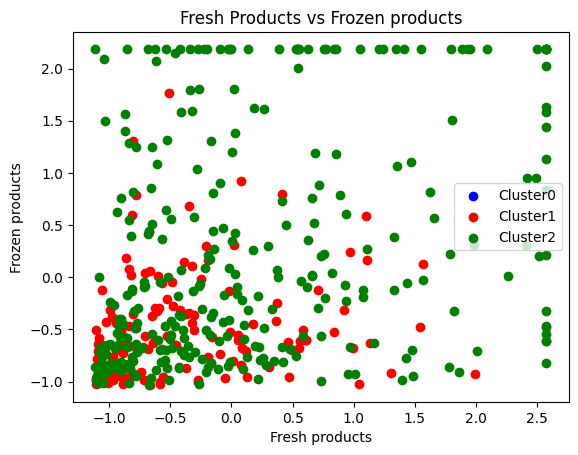

In [ ]:
colors=['r','g','b']
for i in range(max(clusters)+1):
  cluster_data = x_scaled[clusters==i]
  plt.scatter(cluster_data[:,fresh_col_index],
              cluster_data[:,frozen_col_index],
              c = colors[i-1],
              label = f'Cluster{i}')
plt.legend()
plt.xlabel('Fresh products')
plt.ylabel('Frozen products')
plt.title('Fresh Products vs Frozen products')
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
#Kmeans
silhouette_avg=silhouette_score(x_scaled,cluster_label)
print(f'The silhouette score for Kmeans is {silhouette_avg}')

The silhouette score for Kmeans is 0.3252396554040793


In [ ]:
silhouette_avg=silhouette_score(x_scaled,clusters)
print(f'The silhouette score for HC is {silhouette_avg}')

The silhouette score for HC is 0.35874170222328366
